<a href="https://colab.research.google.com/github/shihanxie/Econ475/blob/main/3_1_Cycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make sure we use the most updated version of statsmodels in python
!pip install statsmodels==0.12.0
import statsmodels

In [ ]:
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
import statsmodels.tsa as smt
import matplotlib.pyplot as plt

from google.colab import files

#Simulate ARMA process

## MA(1) process
model 1: $y_t = \epsilon_t + 0.4 \epsilon_{t-1}$

model 2: $y_t = \epsilon_t + 0.95 \epsilon_{t-1}$

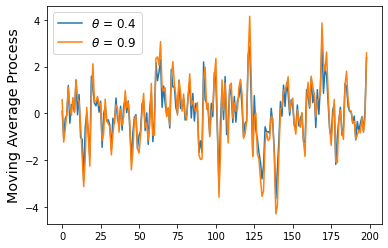

In [ ]:
T = 200
e = np.random.randn(T)
ma = e[1:] + 0.4 * e[:-1]
ma1 = e[1:] + 0.9 * e[:-1]

plt.plot(ma, label = r'$\theta$ = 0.4')
plt.plot(ma1, label = r'$\theta$ = 0.9')
ax = plt.gca()
ax.set_ylabel('Moving Average Process', fontsize = 'x-large')
ax.legend(loc='upper left', fontsize = 'large')

## AR(1) process
model 1: $y_t = 0.4 y_{t-1} + \epsilon_t$

model 2: $y_t = 0.95 y_{t-1} + \epsilon_t$

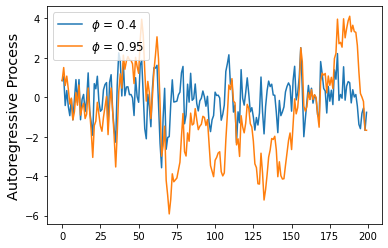

In [ ]:
T = 200
e = np.random.randn(T)
ar = np.zeros(200)
ar[0] = e[0]
for i in range(T-1):
  ar[i+1] = 0.4*ar[i] + e[i+1]

ar1 = np.zeros(200)
ar1[0] = e[0]
for i in range(T-1):
  ar1[i+1] = 0.95*ar1[i] + e[i+1]

plt.plot(ar, label = '$\phi$ = 0.4')
plt.plot(ar1, label = '$\phi$ = 0.95')
ax = plt.gca()
ax.set_ylabel('Autoregressive Process', fontsize = 'x-large')
ax.legend(loc='upper left', fontsize = 'large')

## ARMA models
Alternatively, we can use the built-in functions to simulate the models.

Example model: $(1-1.1L + 0.2L^2)y_t = (1+0.3L)\epsilon_t$

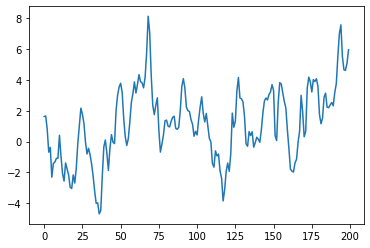

In [ ]:
np.random.seed(1)
model1 = smt.arima_process.ArmaProcess(ar = [1, -1.1, 0.2], ma = [1, 0.3])
model1_data =  model1.generate_sample(200, scale = 1)

plt.plot(model1_data)

To retrieve some features of the simulated model

In [ ]:
model1.arroots

array([1.14921894, 4.35078106])

In [ ]:
model1.maroots

array([-3.33333333])

In [ ]:
model1.isinvertible

True

In [ ]:
model1.isinvertible

True

In [ ]:
acf_model = model1.acf(lags = 24)
pacf_model = model1.pacf(lags = 24)

# Example: Canadian Employment

,CAEMP,date
0,83.090255,1961-03-31
1,82.799634,1961-06-30
2,84.634438,1961-09-30
3,85.377458,1961-12-31
4,86.197605,1962-03-31
...,...,...
131,88.361801,1993-12-31
132,89.031151,1994-03-31
133,91.020295,1994-06-30
134,91.673282,1994-09-30


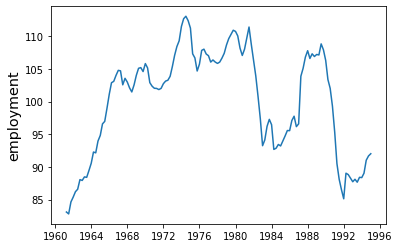

In [ ]:
caemp = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/CanadianEmployment.csv')
caemp['date'] = pd.date_range(start='1961-01-01', periods= caemp.shape[0], freq='Q')

plt.plot(caemp['date'], caemp['CAEMP'], label = 'Canadian Employment')
ax = plt.gca()
ax.set_ylabel('employment', fontsize = 'x-large')

In [ ]:
import statsmodels.tsa.stattools as tst
acf = tst.acf(caemp['CAEMP'], qstat = True)
pacf = tst.pacf(caemp['CAEMP'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1021: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


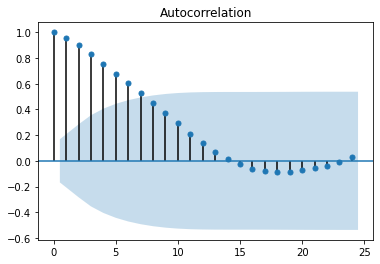

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(caemp['CAEMP'], lags=24)
plt.show()

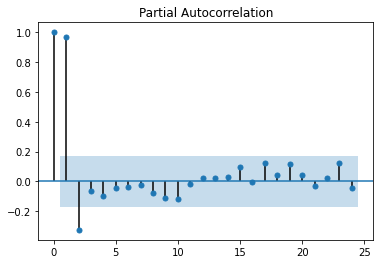

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(caemp['CAEMP'], lags=24)
plt.show()

## AR(2) model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(caemp['CAEMP'], order=(2,0,0))
results = ar_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  CAEMP   No. Observations:                  136
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -242.786
Date:                Sun, 28 Feb 2021   AIC                            493.572
Time:                        22:18:08   BIC                            505.222
Sample:                             0   HQIC                           498.306
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.4779      3.734     26.103      0.000      90.159     104.797
ar.L1          1.4505      0.063     23.127      0.000       1.328       1.573
ar.L2         -0.4762      0.063     -7.606      0.0

In [ ]:
# Check AR roots to ensure model stationarity
results.arroots

array([1.05442642, 1.99174381])

In [ ]:
from statsmodels.stats import diagnostic
bgtest = diagnostic.acorr_breusch_godfrey(results, nlags = 12)
print('Breusch Godfrey test LM statistic: ', bgtest[0])
print('Breusch Godfrey test LM p-value: ', bgtest[1])

Breusch Godfrey test LM statistic:  2.82571106896739
Breusch Godfrey test LM p-value:  0.9966544052276602


In [ ]:
from statsmodels.stats import stattools as st
st.durbin_watson(results.resid)

1.5817599131651958

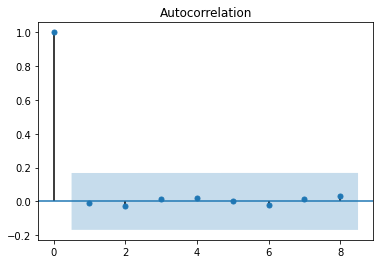

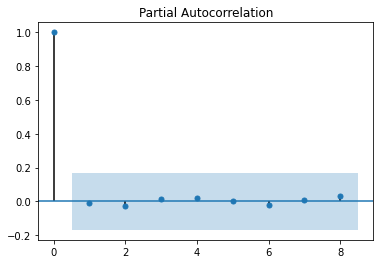

In [ ]:
# ACF and PACF of the model residuals
plot_acf(results.resid, lags=8)
plot_pacf(results.resid, lags=8)
plt.show()

## MA(4) model

In [ ]:
ma_model = ARIMA(caemp['CAEMP'], order=(0,0,4))
results = ma_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  CAEMP   No. Observations:                  136
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -283.631
Date:                Sun, 28 Feb 2021   AIC                            579.262
Time:                        19:38:50   BIC                            596.738
Sample:                             0   HQIC                           586.364
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9265      1.039     96.194      0.000      97.891     101.963
ma.L1          1.6726      0.065     25.586      0.000       1.544       1.801
ma.L2          1.7997      0.105     17.201      0.0

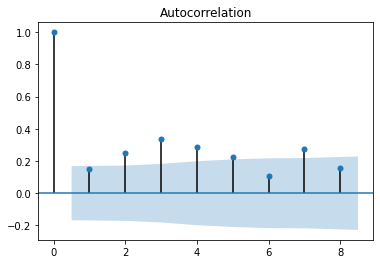

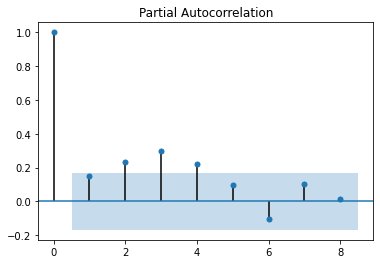

In [ ]:
# ACF and PACF of the residuals
plot_acf(results.resid, lags=8)
plot_pacf(results.resid, lags=8)
plt.show()

##ARMA(3,1) Model

In [ ]:
arma_model = ARIMA(caemp['CAEMP'], order=(3,0,1))
results = arma_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  CAEMP   No. Observations:                  136
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -242.508
Date:                Sun, 28 Feb 2021   AIC                            497.015
Time:                        22:07:06   BIC                            514.491
Sample:                             0   HQIC                           504.117
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.6033      3.726     26.194      0.000      90.300     104.906
ar.L1          0.7357      0.778      0.946      0.344      -0.789       2.260
ar.L2          0.5958      1.070      0.557      0.5

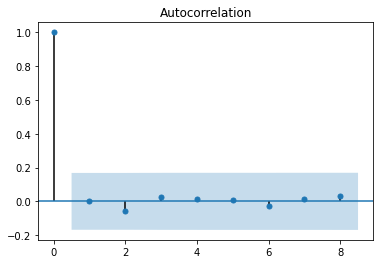

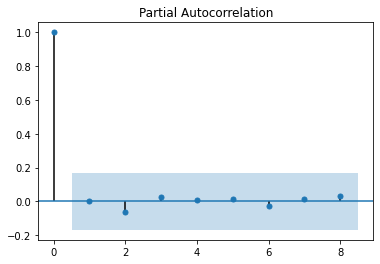

In [ ]:
# ACF and PACF of the residuals
plot_acf(results.resid, lags=8)
plot_pacf(results.resid, lags=8)
plt.show()